### NIS Compute notebook. 

This is a simple notebook used to compute the NIS values when tuning the noise parameters for acceleration and yaw acceleration.

Terminal output is branced to the terminal and a log file by running the UKF app with the command below: 
```
./UnscentedKF | tee ../log.txt
```

This worked fine in the WSL that I am using. It will overwrite the file each time. After each attempt, I would run this notebook in its entirety to verify what affect the changes I made were having. The percentage of points underneath the corresponding chi-squared thresholds for were slightly above 95% but allowing that value to drift a bit higher provided a lower RMSE . My final radar values appear to start high and taper low which I believe is acceptable for this. 

lines 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
L_NIS=[]
R_NIS=[]


with open('log.txt') as inputfile:
    for line in inputfile:
        #print(line[0:3])
        if line[0:2]=='L:':
            L_NIS.append(np.float(line[3:]))
        if line[0:2]=='R:':
            R_NIS.append(np.float(line[3:]))

0.963855421686747


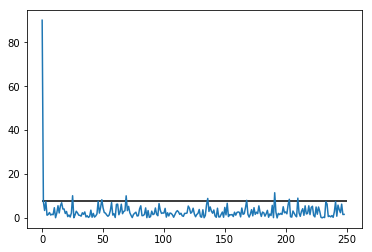

In [5]:
plt.plot(R_NIS);
plt.hlines(7.815,0,250)
R_Pass=sum(nis<7.815 for nis in R_NIS)
print(R_Pass/len(R_NIS))

0.9678714859437751


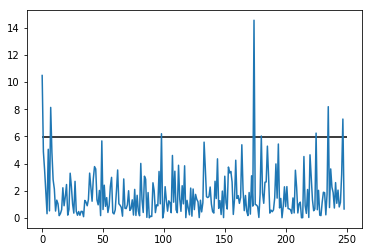

In [6]:
plt.plot(L_NIS);

plt.hlines(5.991,0,250)
L_Pass=sum(nis<5.991 for nis in L_NIS)
print(L_Pass/len(L_NIS))